Collatz analysis notebook

In [2]:
"""
This notebook uses techniques of mathematical analysis to investigate a function
that predicts the alpha (power of two) for a cycle with a specific length
for a certain k-factor.
"""

# Imports
from pathlib import Path, PurePath
from math import log2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collatz import cycles


# Helper functions
def _predict_alpha(k_factor, cycle_lengths):
    result_list = []
    for i in cycle_lengths:
        result_list.append(cycles.predict_cycle_alpha(k_factor, i))
    return result_list


# Configuration
k = 3
max_value = 15

EXPORT_DATA = True
DATA_PATH = Path.cwd().parent.as_posix() + "/data/"
PIC_PATH = DATA_PATH + "analysis.png"
CSV_PATH = DATA_PATH + "analysis.csv"

# Analyse the data
first_fraction = 1
fractions = np.array(range(first_fraction, first_fraction + 2 * max_value, 2))
fractions = k + 1/fractions

analysis_frame = pd.DataFrame({"length": range(1, max_value+1)})
analysis_frame['alpha_pred'] = _predict_alpha(k, analysis_frame['length'])
analysis_frame['2_alpha_pred'] = 2 ** analysis_frame['alpha_pred']

analysis_frame['cycle_min'] = k ** analysis_frame['length']
analysis_frame['cycle_min_log2'] = analysis_frame['cycle_min'].apply(log2)

analysis_frame['cycle_max'] = fractions.cumprod()
analysis_frame['cycle_max_log2'] = analysis_frame['cycle_max'].apply(log2)

analysis_frame['cycle_possible'] = analysis_frame['alpha_pred'] >= analysis_frame['cycle_min_log2']
analysis_frame['cycle_possible'] &= analysis_frame['alpha_pred'] <= analysis_frame['cycle_max_log2']

# Print results
print("K:", k, "\n")

print_frame = analysis_frame[[
    'length', 'alpha_pred', 'cycle_min_log2', "cycle_max_log2", "cycle_possible"]]
print(print_frame)

K: 3 

    length  alpha_pred  cycle_min_log2  cycle_max_log2  cycle_possible
0        1           2        1.584963        2.000000            True
1        2           4        3.169925        3.736966           False
2        3           5        4.754888        5.415037            True
3        4           7        6.339850        7.067114            True
4        5           8        7.924813        8.704544            True
5        6          10        9.509775       10.332575            True
6        7          12       11.094738       11.954064           False
7        8          13       12.679700       13.570735            True
8        9          15       14.264663       15.183712            True
9       10          16       15.849625       16.793765            True
10      11          18       17.434588       18.401448            True
11      12          20       19.019550       20.007169            True
12      13          21       20.604513       21.611240            True

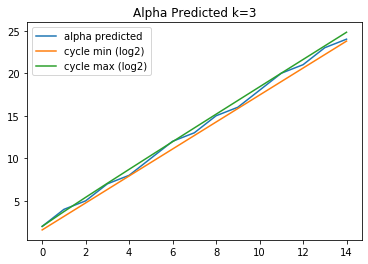

In [3]:
# Plot results

# Predicted alpha vs cycle min and max
plt.figure()
plt.title("Alpha Predicted " + "k=" + str(k))
plt.plot(analysis_frame["alpha_pred"], label='alpha predicted')
plt.plot(analysis_frame["cycle_min_log2"], label="cycle min (log2)")
plt.plot(analysis_frame["cycle_max_log2"], label="cycle max (log2)")
plt.legend()

# Export results
if EXPORT_DATA:
    plt.savefig(PIC_PATH)
    print_frame.to_csv(CSV_PATH, index=False)

plt.show()